In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir("/content/drive/MyDrive/NLP/lab_2")

## Lab 2. Text Normalization (cleaning)

În funcție de task-ul pe care îl avem de realizat, putem alege una sau mai multe modalități de curățare a textului:
- Transformarea textului în litere mici
- Eliminarea cifrelor și numerelor (sau transformarea lor în cuvinte)
- Eliminarea link-urilor
- Eliminarea emoticoanelor ( :) :D) și a emoji-urilor (💙 🐱)
- Eliminarea punctuației
- Eliminarea stopwords
- Stemming/Lematizare
- Tokenizare

Vom folosi setul de date `twitter_samples` din `nltk` (https://www.nltk.org/), care conține tweeturi pozitive și negative. Vom folosi mai departe doar tweeturile pozitive.



In [ ]:
import nltk
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
from nltk.corpus import twitter_samples
tweets = twitter_samples.strings('positive_tweets.json')
tweets = tweets[500:520]
tweets

['Dang that is some rad @AbzuGame #fanart! :D https://t.co/bI8k8tb9ht',
 '@HardcoreGooners @tashagunners @kirstyburns3 @aprilburton21 @liztc2 @Miss_Boots1 @zannatur @NativeNoddy @NatG_22 @Ms_T_P CHEERS #TGIF :-)',
 'Massive congrats to Niamh Fennell here :)  Journalism Graduate Lands Dream Job Copying &amp; Pasting Tweets http://t.co/3db8Bj5trk',
 '@ice_crystal @Elbow @MeatBingo @govindajeggy Thank you! :)',
 'Stats for the day have arrived. 5 new followers and NO unfollowers :) via http://t.co/KfqcXZSVOT.',
 '@mrkennyt90 Yesss I am thank you :D',
 'I have Ariana grande Selena Gomez Louis tomlinson Rita  Liam Payne \nCaradelevingne 🌷I trade solo dm :)',
 '@DomSequitur tired. But fine :) you??',
 '@ohvdqohcdjroc Nope you can definitely still apply for this year if you want to :D #iamCA',
 '@ashleylynch @wetsprocket Ah, found it, thanks :)',
 '@BOYFI_MW aftie :p',
 'Goodmorning :)',
 '@AnneMOrbs  follow @jnlazts &amp; http://t.co/RCvcYYO0Iq follow u back :)',
 '@bjoernknafla @s_whiteant 

### Transformarea textului în litere mici

In [ ]:
tweets_lower = [tweet.lower() for tweet in tweets]
tweets_lower

['dang that is some rad @abzugame #fanart! :d https://t.co/bi8k8tb9ht',
 '@hardcoregooners @tashagunners @kirstyburns3 @aprilburton21 @liztc2 @miss_boots1 @zannatur @nativenoddy @natg_22 @ms_t_p cheers #tgif :-)',
 'massive congrats to niamh fennell here :)  journalism graduate lands dream job copying &amp; pasting tweets http://t.co/3db8bj5trk',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! :)',
 'stats for the day have arrived. 5 new followers and no unfollowers :) via http://t.co/kfqcxzsvot.',
 '@mrkennyt90 yesss i am thank you :d',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne 🌷i trade solo dm :)',
 '@domsequitur tired. but fine :) you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to :d #iamca',
 '@ashleylynch @wetsprocket ah, found it, thanks :)',
 '@boyfi_mw aftie :p',
 'goodmorning :)',
 '@annemorbs  follow @jnlazts &amp; http://t.co/rcvcyyo0iq follow u back :)',
 '@bjoernknafla @s_whiteant 

### Eliminarea cifrelor și numerelor (sau transformarea lor în cuvinte)

Eliminarea cifrelor folosind regex `re`

In [ ]:
import re

tweets_no_digits = [re.sub(r'\d+', '', tweet) for tweet in tweets_lower]
tweets_no_digits

['dang that is some rad @abzugame #fanart! :d https://t.co/biktbht',
 '@hardcoregooners @tashagunners @kirstyburns @aprilburton @liztc @miss_boots @zannatur @nativenoddy @natg_ @ms_t_p cheers #tgif :-)',
 'massive congrats to niamh fennell here :)  journalism graduate lands dream job copying &amp; pasting tweets http://t.co/dbbjtrk',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! :)',
 'stats for the day have arrived.  new followers and no unfollowers :) via http://t.co/kfqcxzsvot.',
 '@mrkennyt yesss i am thank you :d',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne 🌷i trade solo dm :)',
 '@domsequitur tired. but fine :) you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to :d #iamca',
 '@ashleylynch @wetsprocket ah, found it, thanks :)',
 '@boyfi_mw aftie :p',
 'goodmorning :)',
 '@annemorbs  follow @jnlazts &amp; http://t.co/rcvcyyoiq follow u back :)',
 '@bjoernknafla @s_whiteant that’s exactly th

Convertirea cifrelor în numere folosind `num2words`

In [ ]:
! pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=5e8d1ed4b6e6ac37bb67953818b7f25494e0c826ceb0ed448b9e255e8b711ac7
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [ ]:
from num2words import num2words

tweets_num2words = []
for tweet in tweets_lower:
    tweets_num2words.append(' '.join([num2words(word) if word.isdigit() else word for word in tweet.split()]))

tweets_num2words

['dang that is some rad @abzugame #fanart! :d https://t.co/bi8k8tb9ht',
 '@hardcoregooners @tashagunners @kirstyburns3 @aprilburton21 @liztc2 @miss_boots1 @zannatur @nativenoddy @natg_22 @ms_t_p cheers #tgif :-)',
 'massive congrats to niamh fennell here :) journalism graduate lands dream job copying &amp; pasting tweets http://t.co/3db8bj5trk',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! :)',
 'stats for the day have arrived. five new followers and no unfollowers :) via http://t.co/kfqcxzsvot.',
 '@mrkennyt90 yesss i am thank you :d',
 'i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne 🌷i trade solo dm :)',
 '@domsequitur tired. but fine :) you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to :d #iamca',
 '@ashleylynch @wetsprocket ah, found it, thanks :)',
 '@boyfi_mw aftie :p',
 'goodmorning :)',
 '@annemorbs follow @jnlazts &amp; http://t.co/rcvcyyo0iq follow u back :)',
 '@bjoernknafla @s_whiteant th

### Eliminarea link-urilor

In [ ]:
tweets_no_links = [re.sub(r'http\S+', '', tweet) for tweet in tweets_no_digits]
tweets_no_links

['dang that is some rad @abzugame #fanart! :d ',
 '@hardcoregooners @tashagunners @kirstyburns @aprilburton @liztc @miss_boots @zannatur @nativenoddy @natg_ @ms_t_p cheers #tgif :-)',
 'massive congrats to niamh fennell here :)  journalism graduate lands dream job copying &amp; pasting tweets ',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! :)',
 'stats for the day have arrived.  new followers and no unfollowers :) via ',
 '@mrkennyt yesss i am thank you :d',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne 🌷i trade solo dm :)',
 '@domsequitur tired. but fine :) you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to :d #iamca',
 '@ashleylynch @wetsprocket ah, found it, thanks :)',
 '@boyfi_mw aftie :p',
 'goodmorning :)',
 '@annemorbs  follow @jnlazts &amp;  follow u back :)',
 '@bjoernknafla @s_whiteant that’s exactly the look i’m going for :d',
 '#prokabaddi koel mallick @yourkoel recites the "nationa

### Eliminarea emoticoanelor ( :) :D) și a emoji-urilor (💙 🐱)

Eliminarea emoticoanelor folosind regexul din [ nltk Twitter Tokenizer](https://github.com/nltk/nltk/blob/develop/nltk/tokenize/casual.py)

In [ ]:
emoticon_string = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      </?3                       # heart
    )"""
    
emoticon_re = re.compile(emoticon_string, re.VERBOSE | re.I | re.UNICODE)
tweets_no_emoticons = [re.sub(emoticon_re, '', tweet) for tweet in tweets_no_links]
tweets_no_emoticons

['dang that is some rad @abzugame #fanart!  ',
 '@hardcoregooners @tashagunners @kirstyburns @aprilburton @liztc @miss_boots @zannatur @nativenoddy @natg_ @ms_t_p cheers #tgif ',
 'massive congrats to niamh fennell here   journalism graduate lands dream job copying &am pasting tweets ',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! ',
 'stats for the day have arrived.  new followers and no unfollowers  via ',
 '@mrkennyt yesss i am thank you ',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne 🌷i trade solo dm ',
 '@domsequitur tired. but fine  you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to  #iamca',
 '@ashleylynch @wetsprocket ah, found it, thanks ',
 '@boyfi_mw aftie ',
 'goodmorning ',
 '@annemorbs  follow @jnlazts &am  follow u back ',
 '@bjoernknafla @s_whiteant that’s exactly the look i’m going for ',
 '#prokabaddi koel mallick @yourkoel recites the "national anthem" for @starsportsindia on

Eliminarea emoji-urilor folosind `emoji` [library](https://github.com/carpedm20/emoji)

In [ ]:
! pip install emoji
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=afc7c9d429e4b15fd30d43cd6ca195acec4000e24c35903a99730beaa3dd7604
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


Pentru fiecare tweet, `emoji.emoji_list` ne intoarce o lista de dictionare, fiecare avand proprietati ale emoji-urilor: pozitionarea in text si emoji-ul propriu zis.

In [ ]:
text = "💙 🐱 only one leg on september. so perhaps bb will promote the full album on september  🤔 🙄"
emoji.emoji_list(text)

[{'match_start': 0, 'match_end': 1, 'emoji': '💙'},
 {'match_start': 2, 'match_end': 3, 'emoji': '🐱'},
 {'match_start': 87, 'match_end': 88, 'emoji': '🤔'},
 {'match_start': 89, 'match_end': 90, 'emoji': '🙄'}]

In [ ]:
tweets_no_emoji = []
for tweet in tweets_no_emoticons:
    emojis = emoji.emoji_list(tweet)
    
    tweet_no_emoji = tweet
    for emoji_dict in emojis:
        emoji_str = emoji_dict.get("emoji")
        tweet_no_emoji = re.sub(emoji_str, ' ', tweet_no_emoji)

    tweets_no_emoji.append(tweet_no_emoji)

In [ ]:
tweets_no_emoji

['dang that is some rad @abzugame #fanart!  ',
 '@hardcoregooners @tashagunners @kirstyburns @aprilburton @liztc @miss_boots @zannatur @nativenoddy @natg_ @ms_t_p cheers #tgif ',
 'massive congrats to niamh fennell here   journalism graduate lands dream job copying &am pasting tweets ',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! ',
 'stats for the day have arrived.  new followers and no unfollowers  via ',
 '@mrkennyt yesss i am thank you ',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne  i trade solo dm ',
 '@domsequitur tired. but fine  you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to  #iamca',
 '@ashleylynch @wetsprocket ah, found it, thanks ',
 '@boyfi_mw aftie ',
 'goodmorning ',
 '@annemorbs  follow @jnlazts &am  follow u back ',
 '@bjoernknafla @s_whiteant that’s exactly the look i’m going for ',
 '#prokabaddi koel mallick @yourkoel recites the "national anthem" for @starsportsindia on

De asemenea, daca nu dorim sa eliminam emoji-urile, le putem inlocui cu explicatia lor.

In [ ]:
emoji.demojize('album on september 🤔 🙄', language='en')

'album on september :thinking_face: :face_with_rolling_eyes:'

### Eliminarea hashtag-urilor și a mențiunilor

In [ ]:
tweets_no_hashtags = [re.sub(r'#[a-zA-Z0-9_]+','', tweet) for tweet in tweets_no_emoji]
tweets_no_hashtags

['dang that is some rad @abzugame !  ',
 '@hardcoregooners @tashagunners @kirstyburns @aprilburton @liztc @miss_boots @zannatur @nativenoddy @natg_ @ms_t_p cheers  ',
 'massive congrats to niamh fennell here   journalism graduate lands dream job copying &am pasting tweets ',
 '@ice_crystal @elbow @meatbingo @govindajeggy thank you! ',
 'stats for the day have arrived.  new followers and no unfollowers  via ',
 '@mrkennyt yesss i am thank you ',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne  i trade solo dm ',
 '@domsequitur tired. but fine  you??',
 '@ohvdqohcdjroc nope you can definitely still apply for this year if you want to  ',
 '@ashleylynch @wetsprocket ah, found it, thanks ',
 '@boyfi_mw aftie ',
 'goodmorning ',
 '@annemorbs  follow @jnlazts &am  follow u back ',
 '@bjoernknafla @s_whiteant that’s exactly the look i’m going for ',
 ' koel mallick @yourkoel recites the "national anthem" for @starsportsindia on day-!! ',
 ' and \nmonjuly  

In [ ]:
tweets_no_mentions = [re.sub(r'@[a-zA-Z0-9_]+','', tweet) for tweet in tweets_no_hashtags]
tweets_no_mentions

['dang that is some rad  !  ',
 '          cheers  ',
 'massive congrats to niamh fennell here   journalism graduate lands dream job copying &am pasting tweets ',
 '    thank you! ',
 'stats for the day have arrived.  new followers and no unfollowers  via ',
 ' yesss i am thank you ',
 'i have ariana grande selena gomez louis tomlinson rita  liam payne \ncaradelevingne  i trade solo dm ',
 ' tired. but fine  you??',
 ' nope you can definitely still apply for this year if you want to  ',
 '  ah, found it, thanks ',
 ' aftie ',
 'goodmorning ',
 '  follow  &am  follow u back ',
 '  that’s exactly the look i’m going for ',
 ' koel mallick  recites the "national anthem" for  on day-!! ',
 ' and \nmonjuly  uk   \n\n&am  thurjuly itv\n',
 'for most of you it is  but for me it is ...\n for me and  for you!  ',
 'only one leg on september. so perhaps bb will promote the full album on september \n',
 'i still fully intend to write as many game designs as possible while there. and an attack plan

Eliminăm spațiile multiple dintre cuvinte

In [ ]:
tweets_no_spaces = [re.sub(r'\s+', ' ', tweet).strip() for tweet in tweets_no_mentions]
tweets_no_spaces

['dang that is some rad !',
 'cheers',
 'massive congrats to niamh fennell here journalism graduate lands dream job copying &am pasting tweets',
 'thank you!',
 'stats for the day have arrived. new followers and no unfollowers via',
 'yesss i am thank you',
 'i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne i trade solo dm',
 'tired. but fine you??',
 'nope you can definitely still apply for this year if you want to',
 'ah, found it, thanks',
 'aftie',
 'goodmorning',
 'follow &am follow u back',
 'that’s exactly the look i’m going for',
 'koel mallick recites the "national anthem" for on day-!!',
 'and monjuly uk &am thurjuly itv',
 'for most of you it is but for me it is ... for me and for you!',
 'only one leg on september. so perhaps bb will promote the full album on september',
 'i still fully intend to write as many game designs as possible while there. and an attack plan for the next months. &gtd',
 'to all the birds out there, come here and join 

### Tokenizare

- La nivel de propoziție: putem împărți un text în propoziții după punctuație, sau folosind [nltk.sent_tokenize](https://www.nltk.org/api/nltk.tokenize.html)

- La nivel de cuvânt: putem împărți după spațiu, sau să folosim [nltk.word_tokenize](https://www.nltk.org/api/nltk.tokenize.html)

Tokenizare la nivel de popoziție folosind regex



In [ ]:
twitter_sent_tokenized = [re.split('(?<=[.!?])\s+', tweet) for tweet in tweets_no_spaces]
twitter_sent_tokenized

[['dang that is some rad !'],
 ['cheers'],
 ['massive congrats to niamh fennell here journalism graduate lands dream job copying &am pasting tweets'],
 ['thank you!'],
 ['stats for the day have arrived.', 'new followers and no unfollowers via'],
 ['yesss i am thank you'],
 ['i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne i trade solo dm'],
 ['tired.', 'but fine you??'],
 ['nope you can definitely still apply for this year if you want to'],
 ['ah, found it, thanks'],
 ['aftie'],
 ['goodmorning'],
 ['follow &am follow u back'],
 ['that’s exactly the look i’m going for'],
 ['koel mallick recites the "national anthem" for on day-!!'],
 ['and monjuly uk &am thurjuly itv'],
 ['for most of you it is but for me it is ...', 'for me and for you!'],
 ['only one leg on september.',
  'so perhaps bb will promote the full album on september'],
 ['i still fully intend to write as many game designs as possible while there.',
  'and an attack plan for the next months.'

Folosind `nltk.sent_tokenize`

Mai întâi trebuie să downloadăm punctuația din `nltk`

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import sent_tokenize

twitter_sent_tokenized = [nltk.sent_tokenize(tweet) for tweet in tweets_no_spaces]
twitter_sent_tokenized

[['dang that is some rad !'],
 ['cheers'],
 ['massive congrats to niamh fennell here journalism graduate lands dream job copying &am pasting tweets'],
 ['thank you!'],
 ['stats for the day have arrived.', 'new followers and no unfollowers via'],
 ['yesss i am thank you'],
 ['i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne i trade solo dm'],
 ['tired.', 'but fine you?', '?'],
 ['nope you can definitely still apply for this year if you want to'],
 ['ah, found it, thanks'],
 ['aftie'],
 ['goodmorning'],
 ['follow &am follow u back'],
 ['that’s exactly the look i’m going for'],
 ['koel mallick recites the "national anthem" for on day-!', '!'],
 ['and monjuly uk &am thurjuly itv'],
 ['for most of you it is but for me it is ... for me and for you!'],
 ['only one leg on september.',
  'so perhaps bb will promote the full album on september'],
 ['i still fully intend to write as many game designs as possible while there.',
  'and an attack plan for the next mon

Tokenizare la nivel de cuvânt după spații

In [ ]:
for tweet_list in twitter_sent_tokenized:
    print([tweet.split() for tweet in tweet_list])

[['dang', 'that', 'is', 'some', 'rad', '!']]
[['cheers']]
[['massive', 'congrats', 'to', 'niamh', 'fennell', 'here', 'journalism', 'graduate', 'lands', 'dream', 'job', 'copying', '&am', 'pasting', 'tweets']]
[['thank', 'you!']]
[['stats', 'for', 'the', 'day', 'have', 'arrived.'], ['new', 'followers', 'and', 'no', 'unfollowers', 'via']]
[['yesss', 'i', 'am', 'thank', 'you']]
[['i', 'have', 'ariana', 'grande', 'selena', 'gomez', 'louis', 'tomlinson', 'rita', 'liam', 'payne', 'caradelevingne', 'i', 'trade', 'solo', 'dm']]
[['tired.'], ['but', 'fine', 'you?'], ['?']]
[['nope', 'you', 'can', 'definitely', 'still', 'apply', 'for', 'this', 'year', 'if', 'you', 'want', 'to']]
[['ah,', 'found', 'it,', 'thanks']]
[['aftie']]
[['goodmorning']]
[['follow', '&am', 'follow', 'u', 'back']]
[['that’s', 'exactly', 'the', 'look', 'i’m', 'going', 'for']]
[['koel', 'mallick', 'recites', 'the', '"national', 'anthem"', 'for', 'on', 'day-!'], ['!']]
[['and', 'monjuly', 'uk', '&am', 'thurjuly', 'itv']]
[['for

Tokenizare la nivel de cuvânt folosind `nltk.word_tokenize`

In [ ]:
from nltk import word_tokenize

twitter_word_tokenized = [word_tokenize(tweet) for tweet in tweets_no_spaces]
twitter_word_tokenized

[['dang', 'that', 'is', 'some', 'rad', '!'],
 ['cheers'],
 ['massive',
  'congrats',
  'to',
  'niamh',
  'fennell',
  'here',
  'journalism',
  'graduate',
  'lands',
  'dream',
  'job',
  'copying',
  '&',
  'am',
  'pasting',
  'tweets'],
 ['thank', 'you', '!'],
 ['stats',
  'for',
  'the',
  'day',
  'have',
  'arrived',
  '.',
  'new',
  'followers',
  'and',
  'no',
  'unfollowers',
  'via'],
 ['yesss', 'i', 'am', 'thank', 'you'],
 ['i',
  'have',
  'ariana',
  'grande',
  'selena',
  'gomez',
  'louis',
  'tomlinson',
  'rita',
  'liam',
  'payne',
  'caradelevingne',
  'i',
  'trade',
  'solo',
  'dm'],
 ['tired', '.', 'but', 'fine', 'you', '?', '?'],
 ['nope',
  'you',
  'can',
  'definitely',
  'still',
  'apply',
  'for',
  'this',
  'year',
  'if',
  'you',
  'want',
  'to'],
 ['ah', ',', 'found', 'it', ',', 'thanks'],
 ['aftie'],
 ['goodmorning'],
 ['follow', '&', 'am', 'follow', 'u', 'back'],
 ['that', '’', 's', 'exactly', 'the', 'look', 'i', '’', 'm', 'going', 'for'],
 [

### Eliminarea punctuației

Folosind regex

In [ ]:
tweets_no_punct = [re.sub(r'[^\w\s]', '', tweet) for tweet in tweets_no_spaces]
tweets_no_punct

['dang that is some rad ',
 'cheers',
 'massive congrats to niamh fennell here journalism graduate lands dream job copying am pasting tweets',
 'thank you',
 'stats for the day have arrived new followers and no unfollowers via',
 'yesss i am thank you',
 'i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne i trade solo dm',
 'tired but fine you',
 'nope you can definitely still apply for this year if you want to',
 'ah found it thanks',
 'aftie',
 'goodmorning',
 'follow am follow u back',
 'thats exactly the look im going for',
 'koel mallick recites the national anthem for on day',
 'and monjuly uk am thurjuly itv',
 'for most of you it is but for me it is  for me and for you',
 'only one leg on september so perhaps bb will promote the full album on september',
 'i still fully intend to write as many game designs as possible while there and an attack plan for the next months gtd',
 'to all the birds out there come here and join us for a little fun']

Folosind `string.punctuation()`

In [ ]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Traducem fiecare semn de punctuație în ' '.

In [ ]:
tweets_no_punct = [tweet.translate(str.maketrans('', '', string.punctuation)) for tweet in tweets_no_spaces]
tweets_no_punct

['dang that is some rad ',
 'cheers',
 'massive congrats to niamh fennell here journalism graduate lands dream job copying am pasting tweets',
 'thank you',
 'stats for the day have arrived new followers and no unfollowers via',
 'yesss i am thank you',
 'i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne i trade solo dm',
 'tired but fine you',
 'nope you can definitely still apply for this year if you want to',
 'ah found it thanks',
 'aftie',
 'goodmorning',
 'follow am follow u back',
 'that’s exactly the look i’m going for',
 'koel mallick recites the national anthem for on day',
 'and monjuly uk am thurjuly itv',
 'for most of you it is but for me it is  for me and for you',
 'only one leg on september so perhaps bb will promote the full album on september',
 'i still fully intend to write as many game designs as possible while there and an attack plan for the next months gtd',
 'to all the birds out there come here and join us for a little fun']

Tokenizare la nivel de cuvânt după eliminarea punctuației.

In [ ]:
from nltk import word_tokenize

twitter_word_tokenized = [word_tokenize(tweet) for tweet in tweets_no_punct]
twitter_word_tokenized

[['dang', 'that', 'is', 'some', 'rad'],
 ['cheers'],
 ['massive',
  'congrats',
  'to',
  'niamh',
  'fennell',
  'here',
  'journalism',
  'graduate',
  'lands',
  'dream',
  'job',
  'copying',
  'am',
  'pasting',
  'tweets'],
 ['thank', 'you'],
 ['stats',
  'for',
  'the',
  'day',
  'have',
  'arrived',
  'new',
  'followers',
  'and',
  'no',
  'unfollowers',
  'via'],
 ['yesss', 'i', 'am', 'thank', 'you'],
 ['i',
  'have',
  'ariana',
  'grande',
  'selena',
  'gomez',
  'louis',
  'tomlinson',
  'rita',
  'liam',
  'payne',
  'caradelevingne',
  'i',
  'trade',
  'solo',
  'dm'],
 ['tired', 'but', 'fine', 'you'],
 ['nope',
  'you',
  'can',
  'definitely',
  'still',
  'apply',
  'for',
  'this',
  'year',
  'if',
  'you',
  'want',
  'to'],
 ['ah', 'found', 'it', 'thanks'],
 ['aftie'],
 ['goodmorning'],
 ['follow', 'am', 'follow', 'u', 'back'],
 ['that', '’', 's', 'exactly', 'the', 'look', 'i', '’', 'm', 'going', 'for'],
 ['koel',
  'mallick',
  'recites',
  'the',
  'national

Aveti grija la cazurile de tipul "unu,doi". Daca eliminati punctuatia direct, cele doua cuvinte vor fi concatenate obtinand un singur cuvant "unudoi". O alternativa ar fi sa inlocuim mai intai toate caracterele de punctuatie cu spatiu, apoi sa aplicam inca o data metoda de contractie a spatiilor.

In [ ]:
tweets_no_punct = [re.sub(r'[^\w\s]', ' ', tweet) for tweet in tweets_no_spaces]
tweets_no_punct = [re.sub(r'\s+', ' ', tweet) for tweet in tweets_no_punct]
tweets_no_punct

['dang that is some rad ',
 'cheers',
 'massive congrats to niamh fennell here journalism graduate lands dream job copying am pasting tweets',
 'thank you ',
 'stats for the day have arrived new followers and no unfollowers via',
 'yesss i am thank you',
 'i have ariana grande selena gomez louis tomlinson rita liam payne caradelevingne i trade solo dm',
 'tired but fine you ',
 'nope you can definitely still apply for this year if you want to',
 'ah found it thanks',
 'aftie',
 'goodmorning',
 'follow am follow u back',
 'that s exactly the look i m going for',
 'koel mallick recites the national anthem for on day ',
 'and monjuly uk am thurjuly itv',
 'for most of you it is but for me it is for me and for you ',
 'only one leg on september so perhaps bb will promote the full album on september',
 'i still fully intend to write as many game designs as possible while there and an attack plan for the next months gtd',
 'to all the birds out there come here and join us for a little fun']

### Eliminarea stopwords

![stopwords.jpg](https://user.oc-static.com/upload/2021/01/06/16099626487943_P1C2.png) 

Stopwords-urile sunt cele mai folosite cuvinte din limba engleza si au valoare sintactic morfologica, dar nu au si una semantica.
Primele 4 stopwords-uri ale limbii engleze in ordinea aparitiei lor in limba: the, of, and, to.  
Cele mai multe sunt pronume, prepozitii sau conjuctii. 

[The Zipf Law](https://www.youtube.com/watch?v=fCn8zs912OE) afirma ca daca notam $x$ = numarul de aparitii a lui "the", atunci numarul de aparitii al lui "of" va fi foarte apropiat de $\frac{x}{2}$, al lui "and", de $\frac{x}{3}$, al celui de-al n-lea cu $\frac{x}{n}$ (distributia de probabilitati Pareto).

Eliminare stopwords folosind `nltk`

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stop_words_nltk = set(stopwords.words('english'))
print(len(stop_words_nltk))
print(stop_words_nltk)

179
{'themselves', 'weren', 'same', 'won', "won't", 'such', 'so', 'there', 'where', "she's", 'my', 'between', "you're", 'each', 's', 'when', 'his', 'wouldn', 'very', 'before', 'll', "wouldn't", "that'll", 'have', 'herself', 'some', 'didn', 'mightn', 'ma', 'their', 'by', 'these', 'shan', 'couldn', 'me', "wasn't", 'itself', 'theirs', 're', 'does', 'against', 'i', 'she', 'a', 'y', 'if', 'are', 'about', "you've", 'into', 'nor', 'our', 'had', "hadn't", 'no', "didn't", 'from', "doesn't", 'ours', 'any', 'too', 'other', 'here', 'was', 'how', 've', 'needn', 'while', "should've", 'did', 'is', 'than', 'will', 'all', "it's", 'he', "aren't", 'because', 'over', 'ourselves', 'off', 'the', 'you', 'under', 'what', 'him', 'ain', 'we', 'below', 'an', 'own', 'wasn', 'doing', 'but', 'd', 'it', 'be', 'with', "shan't", 'now', 'that', 'isn', 'shouldn', 'after', 'more', "shouldn't", 'on', 'yourself', 'mustn', 'am', 'its', 'them', 'm', 'during', 'once', 'only', "you'll", 'for', 'most', 'few', 'of', 'can', 'whic

In [ ]:
all_words = [word for sent in twitter_word_tokenized for word in sent]
all_words[:20]

['dang',
 'that',
 'is',
 'some',
 'rad',
 'cheers',
 'massive',
 'congrats',
 'to',
 'niamh',
 'fennell',
 'here',
 'journalism',
 'graduate',
 'lands',
 'dream',
 'job',
 'copying',
 'am',
 'pasting']

In [ ]:
all_words_without_stops = [word for word in all_words if word not in stop_words_nltk]
all_words_without_stops[:10]

['dang',
 'rad',
 'cheers',
 'massive',
 'congrats',
 'niamh',
 'fennell',
 'journalism',
 'graduate',
 'lands']

Eliminare stopwords folosind `spacy`

In [ ]:
! python -m spacy download en_core_web_sm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-05 20:17:32.806164: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-05 20:17:32.806275: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-05 20:17:32.806289: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
stop_words_spacy = nlp.Defaults.stop_words
print(len(stop_words_spacy))
print(stop_words_spacy)

326
{'themselves', 'such', 'except', 'seeming', 'mine', 'whose', 'since', 'between', 'each', 'perhaps', 'move', 'very', 'yet', 'name', 'by', 'itself', 'first', 'without', 'against', 'i', 'nothing', 'nor', 'take', 'always', 'various', 'other', 'seem', 'serious', 'is', 'thus', 'noone', 'because', 'ourselves', 'what', 'an', 'together', 'but', 'less', 'somehow', 'would', 'three', 'yourself', 'once', 'make', 'anyhow', 'others', '‘m', 'can', 'of', 'thence', 'either', 'at', "n't", "'s", 'throughout', 'beyond', 'through', 'those', 'whoever', 'became', 'nowhere', 'amongst', 'please', 'not', 'whether', 'being', 'sometimes', 'mostly', 'hereby', 'put', 'among', 'twelve', 'unless', 'whence', 'seems', 'her', 'least', 'used', 'same', '‘s', 'third', "'re", 'there', 'where', 'along', 'seemed', 'someone', 'anywhere', 'becoming', 'when', 'around', 'every', 'onto', 'before', 'have', 'these', 'me', '‘re', 'though', 'does', 'she', 'four', 'a', 'done', 'say', 'ever', 'from', 'herein', 'any', 'thereafter', 'h

In [ ]:
all_words_without_stops = [word for word in all_words if word not in stop_words_spacy]
all_words_without_stops[:10]

['dang',
 'rad',
 'cheers',
 'massive',
 'congrats',
 'niamh',
 'fennell',
 'journalism',
 'graduate',
 'lands']

Putem vizualiza distributia stopwords-urilor folosind matplolib sau wordcloud.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

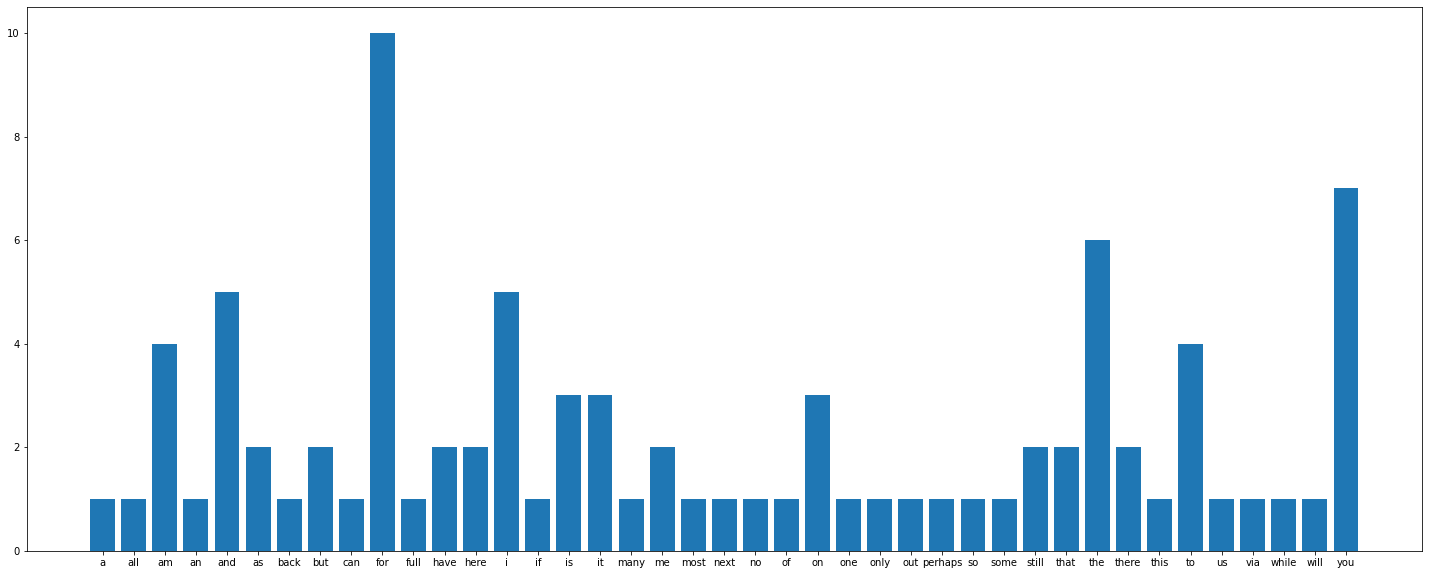

In [ ]:
tweets_stopwords = [word for word in all_words if word in stop_words_spacy]
values, frequencies = np.unique(tweets_stopwords, return_counts=True)
stopwords_dict = {value: freq for value, freq in zip(values, frequencies)}

plt.figure(figsize=(25, 10))
plt.bar(values, frequencies, orientation='vertical')
plt.show()

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


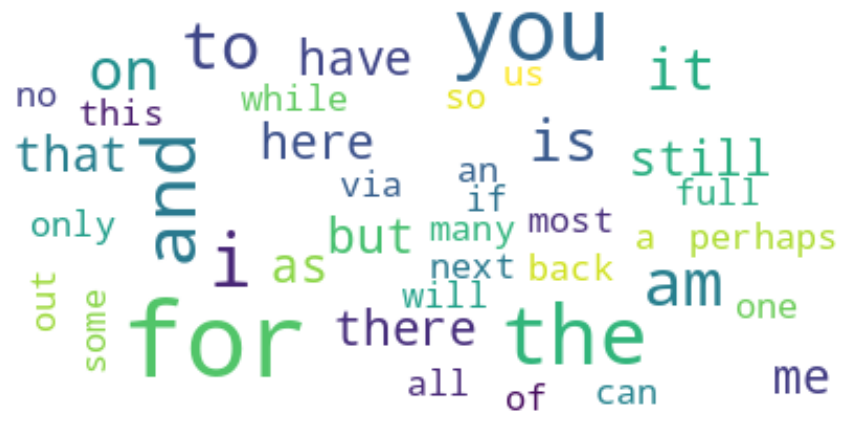

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white")
wordcloud_picture = wordcloud.generate_from_frequencies(stopwords_dict)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Lematizare/Stemming

Au rolul de a elimina inflexiunile cuvintelor: acele caractere care pot ingloba:
- persoana unui verb, in romana: voi cauta**ți** - persoana a2a plural
- timpul unui verb, in romana: voi cauta**seră**ți - mai mult ca perfectul
- etc.

![1_HLQgkMt5-g5WO5VpNuTl_g.jpeg](https://miro.medium.com/max/564/1*HLQgkMt5-g5WO5VpNuTl_g.jpeg)

## Lematizarea
Aduce cuvintele la forma lor din dictionar.

"Lemmatization is the process where we take individual tokens from a sentence and we try to reduce them to their base form. The process that makes this possible is having a vocabulary and performing morphological analysis to remove inflectional endings. The output of the lemmatization process (as shown in the figure above) is the lemma or the base form of the word. For instance, a lemmatization process reduces the inflections, "am", "are", and "is", to the base form, "be". Take a look at the figure above for a full example and try to understand what it's doing.

Lemmatization is helpful for normalizing text for text classification tasks or search engines, and a variety of other NLP tasks such as sentiment classification. It is particularly important when dealing with complex languages like Arabic and Spanish." ([sursa](https://colab.research.google.com/github/dair-ai/notebooks/blob/master/_notebooks/2020-03-19-nlp_basics_tokenization_segmentation.ipynb#scrollTo=dcaLqxPX5CJa))

## Pros:
- rezultatele sunt cuvinte existente in limba

## Cons
- procesul de cautare poate fi costisitor dpdv. computational
- limba este intr-o continua evolutie, iar de cele mai multe ori, dictionarele nu "tin pasul" cu toate cuvintele noi aparute sau imprumutate

## Stemming
Aplica algoiritmi ce folosesc automate finite (remember LFA). Multe dintre ele sunt scrise in limbajul [Snowball](http://snowball.tartarus.org/).

"Stemming is just a simpler version of lemmatization where we are interested in stripping the suffix at the end of the word. When stemming we are interesting in reducing the inflected or derived word to it's base form. Take a look at the figure above to get some intuition about the process.

Both the stemming and the lemmatization processes involve morphological analysis where the stems and affixes (called the morphemes) are extracted and used to reduce inflections to their base form. For instance, the word cats has two morphemes, cat and s, the cat being the stem and the s being the affix representing plurality." ([sursa](https://colab.research.google.com/github/dair-ai/notebooks/blob/master/_notebooks/2020-03-19-nlp_basics_tokenization_segmentation.ipynb#scrollTo=dcaLqxPX5CJa))

## Pros:
- este mai rapida ca lematizarea
- se adapteaza mai usor la cuvinte noi aparute in limba

## Cons
- rezultatele nu sunt intotdeauna, cuvinte existente in limba


In [ ]:
doc = nlp("Apples and oranges are similar boots and hippos aren't")

for word in doc:
    print(word, '=>', word.lemma_)

Apples => Apples
and => and
oranges => oranges
are => avea
similar => similar
boots => boots
and => and
hippos => hippos
aren't => aren't


In [ ]:
# spaCy doesn't support stemming so for this part we are going to use NLTK, which is another fantastic Python NLP library.
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')
doc = 'I prefer not to argue'
for token in doc.split(" "):
    print(token, '=>' , stemmer.stem(token))

I => i
prefer => prefer
not => not
to => to
argue => argu


Pentru procesarea datelor din social media putem folosi și librării dedicate, cum ar fi `Preprocessor`: https://github.com/s/preprocessor

Collocations: in functie de context, putem analiza din toate n-gramele (de cuvinte sau caractere) cel mai probabile sa apara impreuna.

Exemlu: bigrama - pereche de cuvinte cu sanse mari sa coexiste:
('Jegar', 'Sahadutha'), ('Salt', 'Sea'), ('aromatic', 'resin').

Putem aplica cateva functii din pachetul [collocations](https://www.nltk.org/howto/collocations.html) pe cuvintele gasite pe twitter, pentru a gasi top 15 bigrame folosind [Pointwise Mutual Information](https://en.wikipedia.org/wiki/Pointwise_mutual_information).

In [ ]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
bigram_measures = BigramAssocMeasures()
colloc_founder = BigramCollocationFinder.from_words(all_words)

bigram_results = colloc_founder.nbest(bigram_measures.pmi, 15)
bigram_results

[('a', 'little'),
 ('aftie', 'goodmorning'),
 ('ah', 'found'),
 ('an', 'attack'),
 ('ariana', 'grande'),
 ('arrived', 'new'),
 ('attack', 'plan'),
 ('bb', 'will'),
 ('birds', 'out'),
 ('can', 'definitely'),
 ('cheers', 'massive'),
 ('dm', 'tired'),
 ('dream', 'job'),
 ('full', 'album'),
 ('fully', 'intend')]

## Unidecode 
Aduce caracterele utf8 la cea mai apropiata forma ASCII a lor. Este utila atat  pentru inlocuirea diacriticilor limbii romane, cat si pentru a gasi un echivalent pentru 'romanizarea' caracterele asiatice (desi obtine rezultate diferite de Hepburn).

In [ ]:
!pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 10.2 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
unidecode('Leneşul mai mult aleargă, scumpul mai mult păgubeşte')

'Lenesul mai mult alearga, scumpul mai mult pagubeste'

In [ ]:
unidecode('北京')

'Bei Jing '

# TASK:

###Deadline: 19 martie ora 23:59.
###Formular pentru trimiterea temei: https://forms.gle/pvzHYacYCGfFqcy46.


Folosind datasetul urmator, https://github.com/ancatache/LaRoSeDa/tree/main/data - o colectie de review-uri pentru produse in romana, rezolvati urmatoarele cerinte:

1. Curatati si normalizati corpus-ul aplicand urmatoarele operatiii:

    a) afisati caracterele diferite de literele mici ale alfabetului englez

    b) transformati numerele in cuvinte folosind num2words   

    c) eliminati linkurile si alte referinte

    d) curatati-l de semnele de punctuatie

    e) impartiti textele in cuvinte (tokens), va recomandam sa folositi `spacy` incarcand unul din modelele pentru limba romana (https://spacy.io/models/ro)

    f) eliminati stopwords  

    g) aplicati stemming  

    h) aplicati lematizare peste cuvintele obtinute la punctul f. Comparand cu rezultatele de la punctul g, afisati top 15 cuvinte pentru care stemul este diferit de lema, sortate descrescator dupa numarul de caractere prin care stemul difera de lema.

    i) cautati top 20 trigrame (collocations)


2. Calculati frecventele de aparitie ale fiecarui token la punctul e) si punctul g). Plotati-le cum doriti, prin wordcloud sau plotbar. Ce diferente observati? (intrucat numarul de cuvinte distincte poate fi mare, puteti plota informatii doar despre cele mai frecvente N cuvinte)


3. Plotati distributia numarului de tokens per review (nr. de reviews vs. nr. de tokens), atat pentru review-urile negative, cat si, separat, pentru cele pozitive. Ce observati?

In [2]:
import requests
from urllib.request import urlopen
import json
import bs4

def get_page(link):
    return requests.get(link)

def parse_html(html):
    return bs4.BeautifulSoup(html, "html.parser")

reviews_link = []
def get_reviews(link):
    html = get_page(link).content
    soup = parse_html(html)
    links = soup.select("div.Details-content--hidden-not-important div.Box-row div[role=rowheader] span.css-truncate")
  
    for link in links:
      reviews_link.append(f"https://github.com" + link.select_one("a")["href"] + "?raw=true")


get_reviews(f"https://github.com/ancatache/LaRoSeDa/tree/main/data")

In [3]:
response = urlopen(reviews_link[0])
negative_reviews = json.loads(response.read())

# negative_reviews

In [4]:
negative_reviews_content = []
for review in negative_reviews['reviews']:
  negative_reviews_content.append(review['content'])

negative_reviews_content[:5]

['castile au venit intr-un ambalaj destul de solid, asemanator cu cel din poza, insa problema este la sunet, care se aude doar in casca stanga. desi pretul este unul mic, tot nu isi merita banii.',
 'pune pasi in plus, luminozitate mica cand bate soarele, in loc de diacritce si emoticoane se umple egranul cu patrate si pe android nu imi apare cine ma suna, doar ca suna. slabut...',
 'imi cere sa instalez aplicatia bt notice, desi aplicatia este instalata la ceas si este conectata la ceas, nu merge si imi cere sa o instalez.  in rest, este bun, difuzorul cam baraie, cand dai volumul mai tare.  este bunicel, recomand si nu prea, la pretul asta nui de mirare ca nu merge cum ar trebui.(o stea)',
 'foarte frumoasa bratara, mult mai frumoasa decat in poze, cea mai frumoasa bratara fitness pe care am vazut-o pana acum. dar cam atat pot spune, e o bratara frumoasa si scumpa. pentru 700 lei mi se pare innaceptabil sa inregistreze pasi fictivi si nu ma refer doar la miscarea mainii- si daca stai

In [5]:
response = urlopen(reviews_link[1])
positive_reviews = json.loads(response.read())

# positive_reviews

In [6]:
positive_reviews_content = []
for review in positive_reviews['reviews']:
  positive_reviews_content.append(review['content'])

positive_reviews_content[:5]

['am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la 1.000 lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de 1 zi jumatate).    despre ceas:    pro:   - l-am pus la incarcat in a 4-a zi, cu mentiunea ca inca mai avea 20% baterie (m-ar mai fi tinut o zi);  - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de 1-2 batai pe minut (ceea ce este foarte bine);  - pasii sunt cat de cat corecti, cu o eroare de pana la 5% maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare;  - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca si la celelalte functioneaza ok;  - somnul il monitorizeaza destul de foarte exact (daca ma rid

In [29]:
# a. afisati caracterele diferite de literele mici ale alfabetului englez

# POSITIVE REVIEWS
import re

without_lowercase_characters = [re.sub('[a-z]', '', review) for review in positive_reviews_content]
without_lowercase_characters[:5]

['         -       1.000  (       )           -   ....     ,           (   1  ).     :    :   - -      4- ,       20%  (-     );  -     -            1-2    (    );  -      ,       5% ,                ,     ;  -     ,     (-    "",         ;  -        (             "",              );  -    ;  -         (  ),     ,       .    :  -         (   ),        ;  -        .                  (        -               ).    !:)',
 '',
 '    ,       -  .',
 '  .      .    .',
 '          (20%-25%  )          12.30 (        )         (  12.40):  8..//_.      12.40   3-4%   (    )']

In [30]:
# NEGATIVE REVIEWS
import re

without_lowercase_characters = [re.sub('[a-z]', '', review) for review in negative_reviews_content]
without_lowercase_characters[:5]

['   -    ,     ,     ,       .     ,     .',
 '   ,     ,                    ,   . ...',
 '      ,           ,        .   ,  ,   ,     .   ,    ,            .( )',
 '  ,      ,         -  .     ,      .  700                 -     10 -  15 .                .         .          .        2    .      ',
 '            -   ']

In [79]:
# b. transformati numerele in cuvinte folosind num2words 
! pip install num2words

# cazuri:
# 1-2 batai => unu-doi batai
# a 4-a => a patru-a
# 1 zi => unu zi
# 12.30 => doisprezece virgula treizeci
# 5% => cinci la suta
# (20%-25% => (douăzeci la suta-douăzeci și cinci la suta
# 12.40): => doisprezece virgula patruzeci):
# 1.000 => o mie
# 3-4% => trei-patru la suta
# + tratare infinity (gasit in review-urile negative)

from num2words import num2words
import re

def verif(word):
  try:
    float(word)
    if word == 'infinity':
      return False
    return True
  except:
    return False

def transformare_numere_in_cuvinte(reviews):
  reviews_num2words = []
  for review in reviews:
      processed_review = ""
      for word in review.split():
        has_procent = 0
        
        if word[-1] == '%':
          has_procent = 1
          word = word[:-1]

        if word.isdigit():
          processed_review += ' ' + num2words(word, lang="ro")
        elif verif(word):
          if word[::-1].find('.') == 2:
            processed_review += ' ' + num2words(word.split('.')[0], lang="ro") + ' virgula ' + num2words(word.split('.')[1], lang="ro") 
          else:
            word = re.sub(r'[^\w\s]', '', word)
            processed_review += ' ' + num2words(word, lang="ro") 
        elif bool(re.search(r'\d', word)):
            processed_review += ' '
            for word_with_numbers in word.split("-"):
              has_procent1 = 0

              if len(word_with_numbers) == 0:
                continue
                
              if word_with_numbers[-1] == '%':
                has_procent1 = 1
                word_with_numbers = word_with_numbers[:-1]

              if word_with_numbers.isdigit():
                processed_review += num2words(word_with_numbers, lang="ro")
              
              elif bool(re.search(r'\(\d+', word_with_numbers)):
                has_procent2 = 0
                if len( word_with_numbers.split("(")[1]) > 0 and word_with_numbers.split("(")[1][-1] == '%':
                    has_procent2 = 1
                    word_with_numbers.split("(")[1] = word_with_numbers.split("(")[1][:-1]
                
                processed_review += word_with_numbers.split("(")[0] + "("
                if word_with_numbers.split("(")[1].isdigit():
                    processed_review += num2words(word_with_numbers.split("(")[1], lang="ro")
                elif verif(word_with_numbers.split("(")[1]):
                  if word_with_numbers.split("(")[1][::-1].find('.') == 2:
                      processed_review +=  num2words(word_with_numbers.split("(")[1].split('.')[0], lang="ro") + ' virgula ' + num2words(word_with_numbers.split("(")[1].split('.')[1], lang="ro") 
                  else:
                      word_with_numbers = re.sub(r'[^\w\s]', '', word_with_numbers.split("(")[1])
                      processed_review += num2words(word_with_numbers, lang="ro") 
                else: 
                    processed_review +=  word_with_numbers.split("(")[1]

                if has_procent2 == 1:
                      processed_review += ' la suta'
                      
              elif bool(re.search(r'\d+\)', word_with_numbers)): 
                has_procent2 = 0
                if word_with_numbers.split(")")[0][-1] == '%':
                    has_procent2 = 1
                    word_with_numbers.split(")")[0] = word_with_numbers.split(")")[0][:-1]
                
                if word_with_numbers.split(")")[0].isdigit():
                    processed_review += num2words(word_with_numbers.split(")")[0], lang="ro")
                elif verif(word_with_numbers.split(")")[0]):
                  if word_with_numbers.split(")")[0][::-1].find('.') == 2:
                      processed_review += num2words(word_with_numbers.split(")")[0].split('.')[0], lang="ro") + ' virgula ' + num2words(word_with_numbers.split(")")[0].split('.')[1], lang="ro") 
                  else:
                      i = re.sub(r'[^\w\s]', '', word_with_numbers.split(")")[0])
                      processed_review += num2words(i, lang="ro") 
                else: 
                    processed_review += word_with_numbers.split(")")[0]
                
                if has_procent2 == 1:
                      processed_review += ' la suta'
                processed_review += ")" + word_with_numbers.split(")")[1]

              else:
                processed_review += word_with_numbers
              
              if has_procent1 == 1:
                  processed_review += ' la suta'
                  
              processed_review += '-'
            
            processed_review = processed_review[:-1]
          
        else:
          processed_review += ' ' + word
        
        if has_procent == 1:
          processed_review += ' la suta'

      reviews_num2words.append(processed_review)
  return reviews_num2words

positive_reviews_num2words = transformare_numere_in_cuvinte(positive_reviews_content)
positive_reviews_num2words[:5]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[' am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la o mie lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de unu zi jumatate). despre ceas: pro: - l-am pus la incarcat in a patru-a zi, cu mentiunea ca inca mai avea douăzeci la suta baterie (m-ar mai fi tinut o zi); - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de unu-doi batai pe minut (ceea ce este foarte bine); - pasii sunt cat de cat corecti, cu o eroare de pana la cinci la suta maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare; - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca si la celelalte functioneaza ok; - somnul il monitorizeaza destul de fo

In [78]:
# NEGATIVE REVIEWS

negative_reviews_num2words = transformare_numere_in_cuvinte(negative_reviews_content)
negative_reviews_num2words[:5]

[' castile au venit intr-un ambalaj destul de solid, asemanator cu cel din poza, insa problema este la sunet, care se aude doar in casca stanga. desi pretul este unul mic, tot nu isi merita banii.',
 ' pune pasi in plus, luminozitate mica cand bate soarele, in loc de diacritce si emoticoane se umple egranul cu patrate si pe android nu imi apare cine ma suna, doar ca suna. slabut...',
 ' imi cere sa instalez aplicatia bt notice, desi aplicatia este instalata la ceas si este conectata la ceas, nu merge si imi cere sa o instalez. in rest, este bun, difuzorul cam baraie, cand dai volumul mai tare. este bunicel, recomand si nu prea, la pretul asta nui de mirare ca nu merge cum ar trebui.(o stea)',
 ' foarte frumoasa bratara, mult mai frumoasa decat in poze, cea mai frumoasa bratara fitness pe care am vazut-o pana acum. dar cam atat pot spune, e o bratara frumoasa si scumpa. pentru șapte sute lei mi se pare innaceptabil sa inregistreze pasi fictivi si nu ma refer doar la miscarea mainii- si 

In [70]:
# c. eliminati linkurile si alte referinte (am presupus ca referinta inseamna link care nu incepe cu http/https, ci cu www => in text era un link din acesta cu emag)

# POSITIVE REVIEWS
positive_reviews_without_http_links = [re.sub(r'http\S+', '', review) for review in positive_reviews_content]
positive_reviews_without_links = [re.sub(r'www\S+', '', review) for review in positive_reviews_without_http_links]

positive_reviews_without_links[:10]

['am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la 1.000 lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de 1 zi jumatate).    despre ceas:    pro:   - l-am pus la incarcat in a 4-a zi, cu mentiunea ca inca mai avea 20% baterie (m-ar mai fi tinut o zi);  - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de 1-2 batai pe minut (ceea ce este foarte bine);  - pasii sunt cat de cat corecti, cu o eroare de pana la 5% maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare;  - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca si la celelalte functioneaza ok;  - somnul il monitorizeaza destul de foarte exact (daca ma rid

In [33]:
# NEGATIVE REVIEWS
negative_reviews_without_http_links = [re.sub(r'http\S+', '', review) for review in negative_reviews_content]
negative_reviews_without_links = [re.sub(r'www\S+', '', review) for review in negative_reviews_without_http_links]

negative_reviews_without_links[:10]

['castile au venit intr-un ambalaj destul de solid, asemanator cu cel din poza, insa problema este la sunet, care se aude doar in casca stanga. desi pretul este unul mic, tot nu isi merita banii.',
 'pune pasi in plus, luminozitate mica cand bate soarele, in loc de diacritce si emoticoane se umple egranul cu patrate si pe android nu imi apare cine ma suna, doar ca suna. slabut...',
 'imi cere sa instalez aplicatia bt notice, desi aplicatia este instalata la ceas si este conectata la ceas, nu merge si imi cere sa o instalez.  in rest, este bun, difuzorul cam baraie, cand dai volumul mai tare.  este bunicel, recomand si nu prea, la pretul asta nui de mirare ca nu merge cum ar trebui.(o stea)',
 'foarte frumoasa bratara, mult mai frumoasa decat in poze, cea mai frumoasa bratara fitness pe care am vazut-o pana acum. dar cam atat pot spune, e o bratara frumoasa si scumpa. pentru 700 lei mi se pare innaceptabil sa inregistreze pasi fictivi si nu ma refer doar la miscarea mainii- si daca stai

In [71]:
# d. curatati-l de semnele de punctuatie

# POSITIVE REVIEWS
import string

positive_reviews_without_punct = [review.translate(str.maketrans('', '', string.punctuation)) for review in positive_reviews_content]
positive_reviews_without_punct[:5]

['am analizat la sange toate bratarile de fitness si smartwatchurile de pe piata de pana la 1000 lei bugetul maxim alocat de mine pentru aceasta investitie si pot sa spun ca acesta avea cele mai pozite reviewuri mai peste tot alternativa era un apple watch al carui baterie nu tinea mult din ce am inteles in jur de 1 zi jumatate    despre ceas    pro    lam pus la incarcat in a 4a zi cu mentiunea ca inca mai avea 20 baterie mar mai fi tinut o zi   pulsul este foarte precis  am testat comparativ cu un tensiometru si au aparut diferente de 12 batai pe minut ceea ce este foarte bine   pasii sunt cat de cat corecti cu o eroare de pana la 5 maximum insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu aceasta fiind doar o estimare   alergatul il inregistreaza cum trebuie la fel si exercitiile leam introdus la categoria workout insa sunt sigura ca si la celelalte functioneaza ok   somnul il monitorizeaza destul de foarte exact daca ma ridic sa beau apa sau pana la toaleta si inapoi a

In [39]:
# NEGATIVE REVIEWS
import string

negative_reviews_without_punct = [review.translate(str.maketrans('', '', string.punctuation)) for review in negative_reviews_content]
negative_reviews_without_punct[:5]

['castile au venit intrun ambalaj destul de solid asemanator cu cel din poza insa problema este la sunet care se aude doar in casca stanga desi pretul este unul mic tot nu isi merita banii',
 'pune pasi in plus luminozitate mica cand bate soarele in loc de diacritce si emoticoane se umple egranul cu patrate si pe android nu imi apare cine ma suna doar ca suna slabut',
 'imi cere sa instalez aplicatia bt notice desi aplicatia este instalata la ceas si este conectata la ceas nu merge si imi cere sa o instalez  in rest este bun difuzorul cam baraie cand dai volumul mai tare  este bunicel recomand si nu prea la pretul asta nui de mirare ca nu merge cum ar trebuio stea',
 'foarte frumoasa bratara mult mai frumoasa decat in poze cea mai frumoasa bratara fitness pe care am vazuto pana acum dar cam atat pot spune e o bratara frumoasa si scumpa pentru 700 lei mi se pare innaceptabil sa inregistreze pasi fictivi si nu ma refer doar la miscarea mainii si daca stai nemiscat 10min  inregistreaza 15

In [72]:
# pentru subpunctul e. pentru a nu imparti si in functie de spatii daca sunt mai multe (fara punctuatie pentru ca se cere impartirea in cuvinte, deci punctuatia nu se pune)

# POSITIVE REVIEWS
positive_reviews_no_spaces = [re.sub(r'\s+', ' ', review).strip() for review in positive_reviews_without_punct] 
positive_reviews_no_spaces[:10]

['am analizat la sange toate bratarile de fitness si smartwatchurile de pe piata de pana la 1000 lei bugetul maxim alocat de mine pentru aceasta investitie si pot sa spun ca acesta avea cele mai pozite reviewuri mai peste tot alternativa era un apple watch al carui baterie nu tinea mult din ce am inteles in jur de 1 zi jumatate despre ceas pro lam pus la incarcat in a 4a zi cu mentiunea ca inca mai avea 20 baterie mar mai fi tinut o zi pulsul este foarte precis am testat comparativ cu un tensiometru si au aparut diferente de 12 batai pe minut ceea ce este foarte bine pasii sunt cat de cat corecti cu o eroare de pana la 5 maximum insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu aceasta fiind doar o estimare alergatul il inregistreaza cum trebuie la fel si exercitiile leam introdus la categoria workout insa sunt sigura ca si la celelalte functioneaza ok somnul il monitorizeaza destul de foarte exact daca ma ridic sa beau apa sau pana la toaleta si inapoi apare awake urmand 

In [40]:
# NEGATIVE REVIEWS
negative_reviews_no_spaces = [re.sub(r'\s+', ' ', review).strip() for review in negative_reviews_without_punct] 
negative_reviews_no_spaces[:10]

['castile au venit intrun ambalaj destul de solid asemanator cu cel din poza insa problema este la sunet care se aude doar in casca stanga desi pretul este unul mic tot nu isi merita banii',
 'pune pasi in plus luminozitate mica cand bate soarele in loc de diacritce si emoticoane se umple egranul cu patrate si pe android nu imi apare cine ma suna doar ca suna slabut',
 'imi cere sa instalez aplicatia bt notice desi aplicatia este instalata la ceas si este conectata la ceas nu merge si imi cere sa o instalez in rest este bun difuzorul cam baraie cand dai volumul mai tare este bunicel recomand si nu prea la pretul asta nui de mirare ca nu merge cum ar trebuio stea',
 'foarte frumoasa bratara mult mai frumoasa decat in poze cea mai frumoasa bratara fitness pe care am vazuto pana acum dar cam atat pot spune e o bratara frumoasa si scumpa pentru 700 lei mi se pare innaceptabil sa inregistreze pasi fictivi si nu ma refer doar la miscarea mainii si daca stai nemiscat 10min inregistreaza 15 pa

In [73]:
# e. impartiti textele in cuvinte (tokens), va recomandam sa folositi spacy incarcand unul din modelele pentru limba romana (https://spacy.io/models/ro)

# POSITIVE REVIEWS
! python -m spacy download ro_core_news_sm
import spacy

nlp = spacy.load("ro_core_news_sm")

positive_reviews_tokens = []
for review in positive_reviews_no_spaces:
  tokens = []
  for token in nlp(review):
      tokens.append(token.text)

  positive_reviews_tokens.append(tokens)

positive_reviews_tokens[:2]

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-12 21:09:36.645824: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-12 21:09:36.645935: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-12 21:09:36.645956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

[['am',
  'analizat',
  'la',
  'sange',
  'toate',
  'bratarile',
  'de',
  'fitness',
  'si',
  'smartwatchurile',
  'de',
  'pe',
  'piata',
  'de',
  'pana',
  'la',
  '1000',
  'lei',
  'bugetul',
  'maxim',
  'alocat',
  'de',
  'mine',
  'pentru',
  'aceasta',
  'investitie',
  'si',
  'pot',
  'sa',
  'spun',
  'ca',
  'acesta',
  'avea',
  'cele',
  'mai',
  'pozite',
  'reviewuri',
  'mai',
  'peste',
  'tot',
  'alternativa',
  'era',
  'un',
  'apple',
  'watch',
  'al',
  'carui',
  'baterie',
  'nu',
  'tinea',
  'mult',
  'din',
  'ce',
  'am',
  'inteles',
  'in',
  'jur',
  'de',
  '1',
  'zi',
  'jumatate',
  'despre',
  'ceas',
  'pro',
  'lam',
  'pus',
  'la',
  'incarcat',
  'in',
  'a',
  '4a',
  'zi',
  'cu',
  'mentiunea',
  'ca',
  'inca',
  'mai',
  'avea',
  '20',
  'baterie',
  'mar',
  'mai',
  'fi',
  'tinut',
  'o',
  'zi',
  'pulsul',
  'este',
  'foarte',
  'precis',
  'am',
  'testat',
  'comparativ',
  'cu',
  'un',
  'tensiometru',
  'si',
  'au',
 

In [41]:
# NEGATIVE REVIEWS
# ! python -m spacy download ro_core_news_sm
import spacy

nlp = spacy.load("ro_core_news_sm")

negative_reviews_tokens = []
for review in negative_reviews_no_spaces:
  tokens = []
  for token in nlp(review):
      tokens.append(token.text)

  negative_reviews_tokens.append(tokens)

negative_reviews_tokens[:2]

[['castile',
  'au',
  'venit',
  'intrun',
  'ambalaj',
  'destul',
  'de',
  'solid',
  'asemanator',
  'cu',
  'cel',
  'din',
  'poza',
  'insa',
  'problema',
  'este',
  'la',
  'sunet',
  'care',
  'se',
  'aude',
  'doar',
  'in',
  'casca',
  'stanga',
  'desi',
  'pretul',
  'este',
  'unul',
  'mic',
  'tot',
  'nu',
  'isi',
  'merita',
  'banii'],
 ['pune',
  'pasi',
  'in',
  'plus',
  'luminozitate',
  'mica',
  'cand',
  'bate',
  'soarele',
  'in',
  'loc',
  'de',
  'diacritce',
  'si',
  'emoticoane',
  'se',
  'umple',
  'egranul',
  'cu',
  'patrate',
  'si',
  'pe',
  'android',
  'nu',
  'imi',
  'apare',
  'cine',
  'ma',
  'suna',
  'doar',
  'ca',
  'suna',
  'slabut']]

In [14]:
# f.1. eliminati stopwords

# selectez toate stopword-urile
stop_words_spacy = nlp.Defaults.stop_words
print(len(stop_words_spacy))
print(stop_words_spacy)

494
{'șase', 'sînt', 'na', 'unii', 'din', 'daca', 'citi', 'nicidecat', 'odinioară', 'prin', 'aceştia', 'acestei', 'sîntem', 'inapoi', 'acord', 'm', 'oricât', 'zi', 'fii', 'voastră', 'parcă', 'sunt', 'carora', 'face', 'odata', 'mulţumesc', 'fiu', 'căror', 'aceşti', 'altii', 'câţi', 'toate', 'le', 'eu', 'aţi', 'mulțumesc', 'aiurea', 'atatea', 'nimeri', 'anume', 'aș', 'către', 'conform', 'rog', 'deci', 'el', 'cei', 'acum', 'întrucât', 'şi', 'unu', 'ati', 'alea', 'cite', 'tale', 'altcineva', 'u', 'intr', 'zero', 'prima', 'una', 'uneia', 'ei', 'întrucît', 'același', 'altceva', 'aici', 'vreun', 'ceea', 'atata', 'e', 'cînd', 'cineva', 'avut', 'f', 'sa-ti', 'ai', 'sale', 'ăstea', 'desi', 'cea', 'nouă', 'în', 'insa', 'lângă', 'acea', 'cat', 'avem', 'aceasta', 'nostru', 'niciodata', 'lor', 'uneori', 'dă', 'îmi', 'ce', 'departe', 'cand', 'odată', 'ea', 'mine', 'asupra', 'asta', 'plus', 'astazi', 'așadar', 'neîncetat', 'știu', 'macar', 'noastră', 'te', 'dată', 'alta', 'unora', 'acestea', 'tine', '

In [74]:
# f.2. concatenez reviews_tokens de la e. ca sa avem doar o lista (nu lista de liste)

# POSITIVE REVIEWS
all_positive_words = [word for sent in positive_reviews_tokens for word in sent]
all_positive_words[:30]

['am',
 'analizat',
 'la',
 'sange',
 'toate',
 'bratarile',
 'de',
 'fitness',
 'si',
 'smartwatchurile',
 'de',
 'pe',
 'piata',
 'de',
 'pana',
 'la',
 '1000',
 'lei',
 'bugetul',
 'maxim',
 'alocat',
 'de',
 'mine',
 'pentru',
 'aceasta',
 'investitie',
 'si',
 'pot',
 'sa',
 'spun']

In [43]:
# NEGATIVE REVIEWS

all_negative_words = [word for sent in negative_reviews_tokens for word in sent]
all_negative_words[:30]

['castile',
 'au',
 'venit',
 'intrun',
 'ambalaj',
 'destul',
 'de',
 'solid',
 'asemanator',
 'cu',
 'cel',
 'din',
 'poza',
 'insa',
 'problema',
 'este',
 'la',
 'sunet',
 'care',
 'se',
 'aude',
 'doar',
 'in',
 'casca',
 'stanga',
 'desi',
 'pretul',
 'este',
 'unul',
 'mic']

In [44]:
# f.3. iau cuvintele fara stopword-uri
# POSITIVE REVIEWS
all_positive_words_without_stops = [word for word in all_positive_words if word not in stop_words_spacy]
all_positive_words_without_stops[:10]

['analizat',
 'sange',
 'bratarile',
 'fitness',
 'smartwatchurile',
 'piata',
 'pana',
 '1000',
 'lei',
 'bugetul']

In [45]:
# NEGATIVE REVIEWS
all_negative_words_without_stops = [word for word in all_negative_words if word not in stop_words_spacy]
all_negative_words_without_stops[:10]

['castile',
 'venit',
 'intrun',
 'ambalaj',
 'destul',
 'solid',
 'asemanator',
 'poza',
 'problema',
 'sunet']

In [46]:
# g. aplicati stemming
# spaCy doesn't support stemming so for this part we are going to use NLTK, which is another fantastic Python NLP library.
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='romanian')

# POSITIVE REVIEWS
positive_words_after_stemming = [stemmer.stem(token) for token in all_positive_words_without_stops]
positive_words_after_stemming[:10]

['analiz',
 'sang',
 'bratar',
 'fitness',
 'smartwatchur',
 'piat',
 'pan',
 '1000',
 'lei',
 'buget']

In [47]:
# NEGATIVE REVIEWS
negative_words_after_stemming = [stemmer.stem(token) for token in all_negative_words_without_stops]
negative_words_after_stemming[:10]

['cast',
 'venit',
 'intrun',
 'ambalaj',
 'dest',
 'solid',
 'aseman',
 'poz',
 'problem',
 'sunet']

In [48]:
# h.1. aplicati lematizare peste cuvintele obtinute la punctul f. Comparand cu rezultatele de la punctul g,
# afisati top 15 cuvinte pentru care stemul este diferit de lema, sortate descrescator dupa numarul de caractere prin care stemul difera de lema.

# POSITIVE REVIEWS
positive_words_after_lemma = [nlp(word)[0].lemma_ for word in all_positive_words_without_stops]
positive_words_after_lemma[:10]

['analiza',
 'sange',
 'bratarile',
 'fitness',
 'smartwatchurile',
 'piată',
 'pană',
 '1000',
 'leu',
 'buget']

In [49]:
# NEGATIVE REVIEWS
negative_words_after_lemma = [nlp(word)[0].lemma_ for word in all_negative_words_without_stops]
negative_words_after_lemma[:10]

['castile',
 'veni',
 'intrun',
 'ambalaj',
 'destul',
 'solid',
 'asemanatora',
 'poză',
 'problemă',
 'sunet']

In [50]:
# h.2.
# presupun ca se doreste ca top 15 sa contina cuvinte diferite, in caz contrar apare pe primele 7 pozitii cuvantul "mp" cu diferenta 10

# POSITIVE REVIEWS
diff = []

for i in range(len(all_positive_words_without_stops)):
  if positive_words_after_stemming[i] != positive_words_after_lemma[i]:
    diff.append((all_positive_words_without_stops[i], positive_words_after_stemming[i], positive_words_after_lemma[i], len(positive_words_after_lemma[i]) - len(positive_words_after_stemming[i])))

diff = list(set(diff))   # am luat o singura data fiecare cuvant care apare diferit in cele 2 liste
diff.sort(key = lambda i:i[3], reverse = True) # sortez in functie de diferenta
top15 = diff[:15]   # iau primele 15

for word, stem_word, lemma_word, difference in top15:
  print(f"word in text: {word}, stem word: {stem_word}, lemma word: {lemma_word}, difference: {difference}")

word in text: mp, stem word: mp, lemma word: metru_pătrat, difference: 10
word in text: extensibilitatea, stem word: extens, lemma word: extensibilitate, difference: 9
word in text: disponibilitatea, stem word: dispon, lemma word: disponibilitate, difference: 9
word in text: incarcatoarelor, stem word: incarc, lemma word: incarcatoarelor, difference: 9
word in text: functionabilitate, stem word: function, lemma word: functionabilitate, difference: 9
word in text: compatibilitatea, stem word: compat, lemma word: compatibilitate, difference: 9
word in text: imposibilitatea, stem word: impos, lemma word: imposibilitate, difference: 9
word in text: elasticitatii, stem word: elast, lemma word: elasticitatii, difference: 8
word in text: functionalitatilor, stem word: functional, lemma word: functionalitatilor, difference: 8
word in text: necesitatilor, stem word: neces, lemma word: necesitatilor, difference: 8
word in text: compatibilitate, stem word: compat, lemma word: compatibilitat, diff

In [51]:
# NEGATIVE REVIEWS
diff = []

for i in range(len(all_negative_words_without_stops)):
  if negative_words_after_stemming[i] != negative_words_after_lemma[i]:
    diff.append((all_negative_words_without_stops[i], negative_words_after_stemming[i], negative_words_after_lemma[i], len(negative_words_after_lemma[i]) - len(negative_words_after_stemming[i])))

diff = list(set(diff))   # am luat o singura data fiecare cuvant care apare diferit in cele 2 liste
diff.sort(key = lambda i:i[3], reverse = True) # sortez in functie de diferenta
top15 = diff[:15]   # iau primele 15

for word, stem_word, lemma_word, difference in top15:
  print(f"word in text: {word}, stem word: {stem_word}, lemma word: {lemma_word}, difference: {difference}")

word in text: cee, stem word: cee, lemma word: Comunitatea_Economică_Europeană, difference: 28
word in text: mp, stem word: mp, lemma word: metru_pătrat, difference: 10
word in text: senzitivitatea, stem word: senz, lemma word: senzitivitate, difference: 9
word in text: responabilitatea, stem word: respon, lemma word: responabilitate, difference: 9
word in text: functionabilitatea, stem word: function, lemma word: functionabilitate, difference: 9
word in text: responsabilitatea, stem word: respons, lemma word: responsabilitate, difference: 9
word in text: compatibilitatea, stem word: compat, lemma word: compatibilitate, difference: 9
word in text: imposibilitatea, stem word: impos, lemma word: imposibilitate, difference: 9
word in text: nevandabilitatea, stem word: nevand, lemma word: nevandabilitate, difference: 9
word in text: neconformitatilor, stem word: neconform, lemma word: neconformitatilor, difference: 8
word in text: iresponsabilitate, stem word: irespons, lemma word: irespon

In [52]:
# i. cautati top 20 trigrame (collocations)
# POSITIVE REVIEWS
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
trigram_measures = TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(all_positive_words)

trigram_results = finder.nbest(trigram_measures.pmi, 20)
trigram_results

[('2591', 'mhz', 'telecomada'),
 ('326', '4ω10w', 'protejate'),
 ('a10', 'fusion', 'proceseaza'),
 ('acte', 'pregatite', 'chitanta'),
 ('admir', 'frumusetile', 'romaniei'),
 ('angry', 'birds', 'racing'),
 ('armour', 'record', 'endomondo'),
 ('aspire', 'e5', '572g'),
 ('autoturismul', 'honda', 'civic'),
 ('avizul', 'comisiei', 'europene'),
 ('basscu', 'dolby', 'atmos'),
 ('brata', '670', 'klc'),
 ('can', 'be', 'configured'),
 ('canale', 'satelit', 'asteptativa'),
 ('certified', 'durability', 'milstd810g'),
 ('cia', 'fbi', 'kgt'),
 ('colegul', 'silviu', 'panica'),
 ('cunoasterea', 'limbii', 'engleze'),
 ('custii', 'faraday', 'repeaterul'),
 ('denumindule', 'ch01', 'ch50')]

In [53]:
# NEGATIVE REVIEWS
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
trigram_measures = TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(all_negative_words)

trigram_results = finder.nbest(trigram_measures.pmi, 20)
trigram_results

[('11777', '11878', '12080'),
 ('11878', '12080', '11575'),
 ('15min', 'browserfacebook', 'tweeeter'),
 ('apregiez', 'thumbsupemag', 'aztazi'),
 ('arm', '®', 'cortex'),
 ('ascend', 'y5', 'y560'),
 ('browserfacebook', 'tweeeter', 'wattsup'),
 ('chemat', 'salvarea', 'constatind'),
 ('contacts', 'crashes', 'freezes'),
 ('cortex', '™', 'm0'),
 ('cpu', 'arm', '®'),
 ('denver', 'tsp', '303'),
 ('deslipirea', 'componentelor', 'interioare'),
 ('distractii', 'zbori', 'calatoresti'),
 ('extensibil', 'yunteng', '1288'),
 ('fiio', 'q1', 'mark'),
 ('from', 'two', 'wires'),
 ('hangs', 'from', 'two'),
 ('imbunatatiti', 'reactualizati', 'obtiune'),
 ('inteleasa', 'usordoar', 'alineate')]

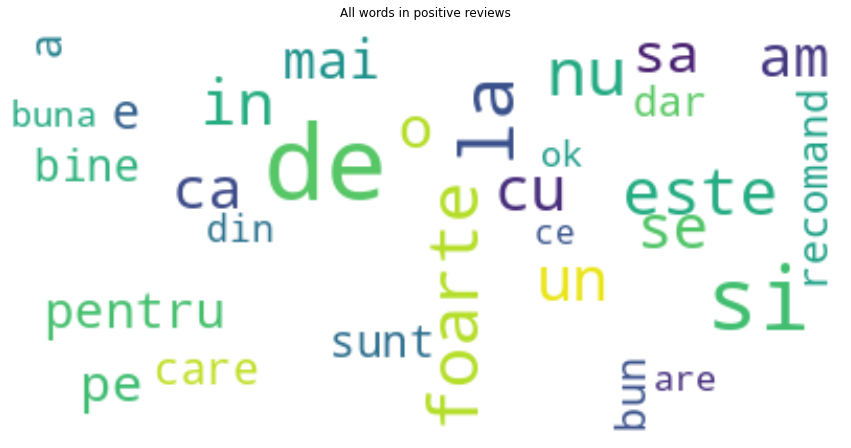

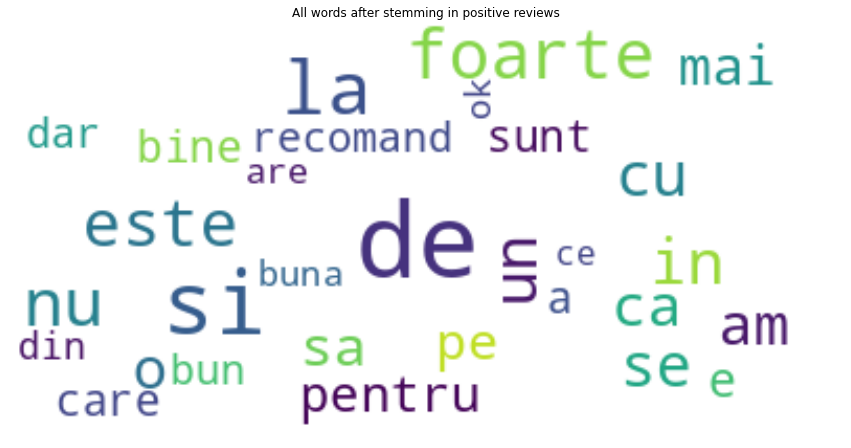

In [57]:
# 2. Calculati frecventele de aparitie ale fiecarui token la punctul e) si punctul g). Plotati-le cum doriti, prin wordcloud sau plotbar. 
# Ce diferente observati? (intrucat numarul de cuvinte distincte poate fi mare, puteti plota informatii doar despre cele mai frecvente N cuvinte)
import matplotlib.pyplot as plt
import numpy as np
# !pip install wordcloud

# POSITIVE REVIEWS

N = 30
values_e, frequencies_e = np.unique(all_positive_words, return_counts=True)
all_words_dict = {value: freq for value, freq in zip(values_e, frequencies_e)}

first_n_words_dict = sorted(all_words_dict.items(), key=lambda x:(-x[1]))
first_n_words_dict = first_n_words_dict[:N]
first_n_words_dict = dict(first_n_words_dict)

values_g, frequencies_g = np.unique(positive_words_after_stemming, return_counts=True)
words_after_stemming_dict = {value: freq for value, freq in zip(values_e, frequencies_e)}

first_n_words_after_stemming_dict = sorted(words_after_stemming_dict.items(), key=lambda x:(-x[1]))
first_n_words_after_stemming_dict = first_n_words_after_stemming_dict[:N]
first_n_words_after_stemming_dict = dict(first_n_words_after_stemming_dict)

from wordcloud import WordCloud
wordcloud_e = WordCloud(max_font_size=50, max_words=1000, background_color="white")
wordcloud_e_picture = wordcloud_e.generate_from_frequencies(first_n_words_dict)

plt.figure(figsize=(15, 10))
plt.title("All words in positive reviews")
plt.imshow(wordcloud_e, interpolation='bilinear')
plt.axis('off')
plt.show()

print()
print()
print()

wordcloud_f = WordCloud(max_font_size=50, max_words=1000, background_color="white")
wordcloud_f_picture = wordcloud_f.generate_from_frequencies(first_n_words_after_stemming_dict)

plt.figure(figsize=(15, 10))
plt.title("All words after stemming in positive reviews")
plt.imshow(wordcloud_f, interpolation='bilinear')
plt.axis('off')
plt.show()

# Observatii: pentru N = 30 se observa ca sunt aceleasi cuvinte in wordcloud pentru tokenurile de la punctul e) si cele de la punctul g)

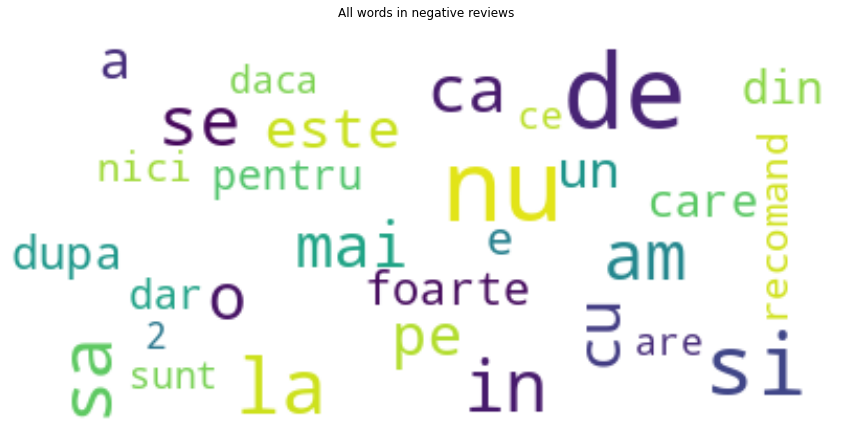

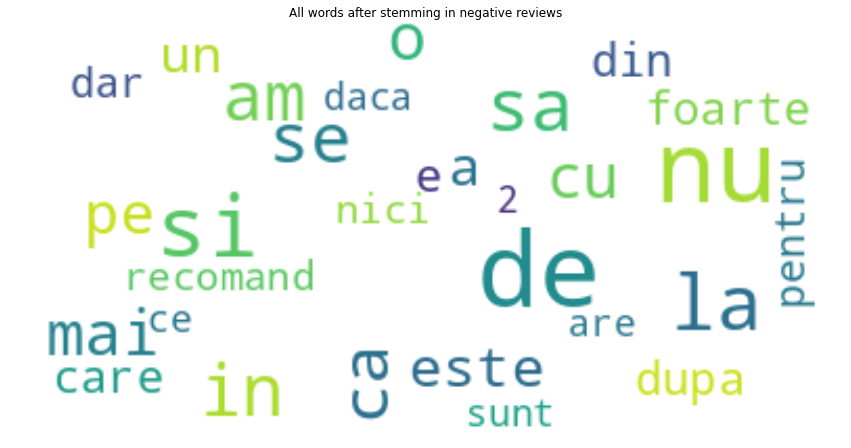

In [58]:
# NEGATIVE REVIEWS
N = 30
values_e, frequencies_e = np.unique(all_negative_words, return_counts=True)
all_words_dict = {value: freq for value, freq in zip(values_e, frequencies_e)}

first_n_words_dict = sorted(all_words_dict.items(), key=lambda x:(-x[1]))
first_n_words_dict = first_n_words_dict[:N]
first_n_words_dict = dict(first_n_words_dict)

values_g, frequencies_g = np.unique(negative_words_after_stemming, return_counts=True)
words_after_stemming_dict = {value: freq for value, freq in zip(values_e, frequencies_e)}

first_n_words_after_stemming_dict = sorted(words_after_stemming_dict.items(), key=lambda x:(-x[1]))
first_n_words_after_stemming_dict = first_n_words_after_stemming_dict[:N]
first_n_words_after_stemming_dict = dict(first_n_words_after_stemming_dict)

from wordcloud import WordCloud
wordcloud_e = WordCloud(max_font_size=50, max_words=1000, background_color="white")
wordcloud_e_picture = wordcloud_e.generate_from_frequencies(first_n_words_dict)

plt.figure(figsize=(15, 10))
plt.title("All words in negative reviews")
plt.imshow(wordcloud_e, interpolation='bilinear')
plt.axis('off')
plt.show()

print()
print()
print()

wordcloud_f = WordCloud(max_font_size=50, max_words=1000, background_color="white")
wordcloud_f_picture = wordcloud_f.generate_from_frequencies(first_n_words_after_stemming_dict)

plt.figure(figsize=(15, 10))
plt.title("All words after stemming in negative reviews")
plt.imshow(wordcloud_f, interpolation='bilinear')
plt.axis('off')
plt.show()

# Observatii: pentru N = 30 se observa ca sunt aceleasi cuvinte in wordcloud pentru tokenurile de la punctul e) si cele de la punctul g)

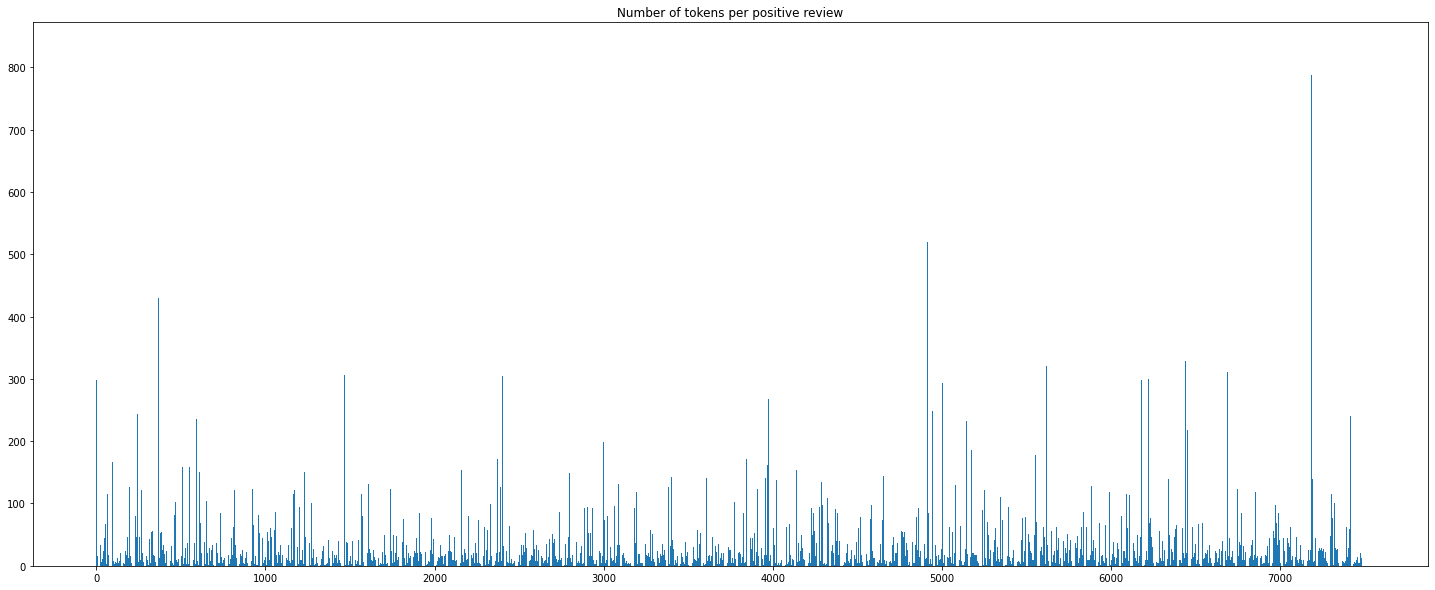

In [65]:
# 3. Plotati distributia numarului de tokens per review (nr. de reviews vs. nr. de tokens), atat pentru review-urile negative, cat si, separat, pentru cele pozitive.
# Ce observati?

import matplotlib.pyplot as plt
import numpy as np

# POSITIVE REVIEWS
tokens_per_positive_reviews = dict()
for value in range(1, len(positive_reviews_tokens) + 1):
  tokens_per_positive_reviews[value] = len(positive_reviews_tokens[value - 1])

plt.figure(figsize=(25, 10))
plt.title("Number of tokens per positive review")
plt.bar(tokens_per_positive_reviews.keys(), tokens_per_positive_reviews.values(), orientation='vertical')
plt.show()


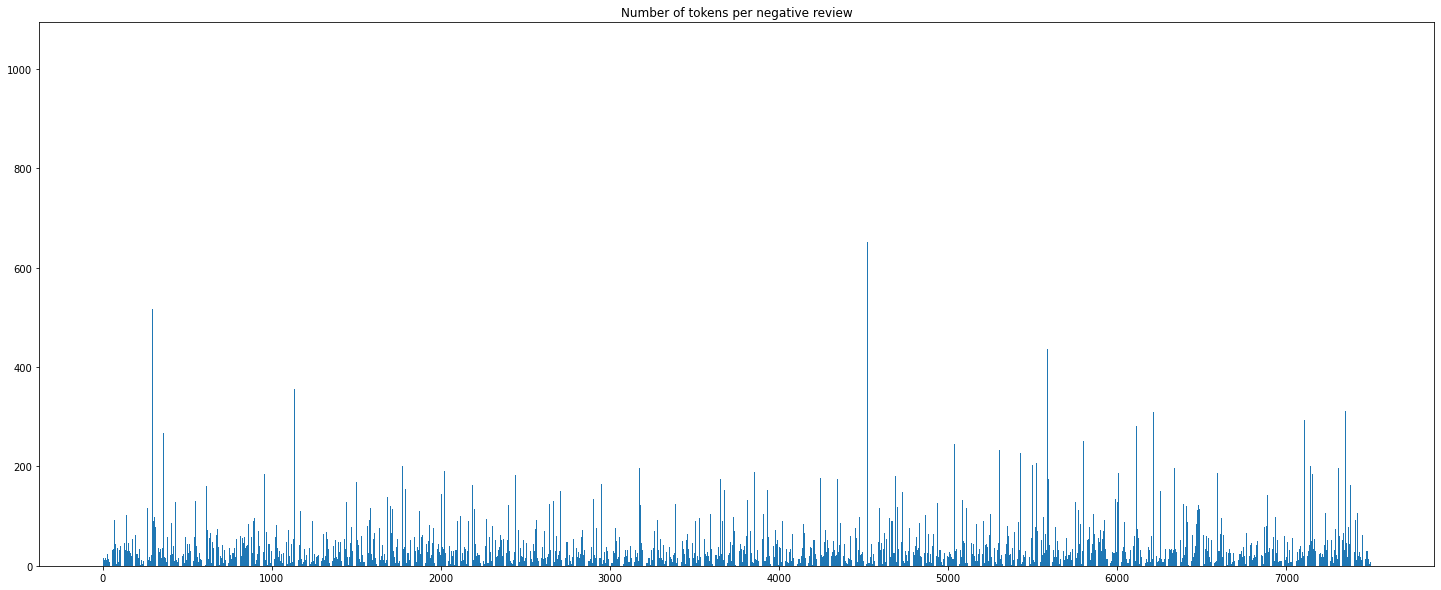

In [67]:
# NEGATIVE REVIEWS
tokens_per_negative_reviews = dict()
for value in range(1, len(negative_reviews_tokens) + 1):
  tokens_per_negative_reviews[value] = len(negative_reviews_tokens[value - 1])

plt.figure(figsize=(25, 10))
plt.title("Number of tokens per negative review")
plt.bar(tokens_per_negative_reviews.keys(), tokens_per_negative_reviews.values(), orientation='vertical')
plt.show()

Observatii: 
Reviewurile pozitive au in general mai multe cuvinte decat cele negative. 